# <center>US Veteran Suicides</center>
<center>By</center>
<br>
<center>John Callahan</center>

# Introduction
I decided to do my project on veteran suicides in the Unites States from 2001-2021.  I downloaded the data set from:<br>
*U.S. Department of Veterans Affairs<br>
https://www.mentalhealth.va.gov/docs/data-sheets/2021/VA_State_Sheets_2001-2021_Appendix_508.xlsx<br>

A few notes about the dataset:<br>
- For the purpose of this study District of Columbia is listed as a state.  U.S. Territories Puerto Rico, U.S. Virgin Islands, American Samoa, Guam, and Northern Marianas are not included as I did not load that worksheet.<br>
- Age-specific counts may not sum to the total counts because the small number of deaths for which age information is unavailable are included in the total counts and rates but are not included in age-specific counts or age-specific rates.<br>
- Counts and rates are suppressed when based on fewer than 10 deaths, and when the count for only one category is lower than 10, a range is presented and the rate suppressed for the next smallest to maintain confidentiality. Rates are marked with an asterisk (*) when the rate is calculated based on fewer than 20 deaths. Rates based on small numbers of deaths are considered unreliable, and a small change in the number of deaths might result in a large change in the rate. Because suicide rates based on fewer than 20 suicide deaths are considered statistically unreliable, any comparisons of age-adjusted rates with underlying age-specific rates with less than 20 suicide deaths should be interpreted with caution.<br>


After reviewing the datasets, I will be able to answer the following questions:<br>
    
    1. Which years have the highest and lowest number of veteran suicides?
    2. Which states have the highest and lowest number of veteran suicides in 2021?
    3. Which region has the highest mean of veteran suicides?
    4. Are veteran suicides increasing over the years?
    5. Are men or women more at risk for veteran suicide?
    6. Which age groups have the highest and lowest number of veteran suicides?
    7. Are the age groups and their suicide rates consistent over the years?
    8. What are the highest Veteran Suicide Rates per 100k of population for the states in 2021?
    9. Did the order of the highest and lowest states change based on the population?
    10. What is the mean of Veteran Suicide Rates per 100k of population for each region?
    11. Did the order of the regions change based on the population?
    12. Are the Veteran Suicide Rates per 100k of population for the Regions changing?
    13. Are veterans more vulnerable to suicide than the general population?
    
    
     

In [2]:
#Import Required Libraries

import pandas as pd
import numpy as np

#Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

#set default seaborn style

sns.set()

#choropleth maps

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,plot,iplot

#Setup choloreplth to show in the jupyter notebook

init_notebook_mode(connected=True)

#import cufflinks

import cufflinks as cf

# This will allow you to use cufflinks offline
cf.go_offline()

from plotly import __version__

print(__version__) # requires version >= 1.9.0

#Filter warnings

import warnings
warnings.filterwarnings('ignore')

#Line Magic to display plots in jupyter notebook

%matplotlib inline

5.9.0


# Importing Data
Load the VA_State_Sheets_2001-2021_Appendix_508 Excel worksheet into dataframes by worksheet.

In [3]:
#Read the VA_State_Sheets_2001-2021_Appendix_508.xlsx into separate dataframes based on worksheet skipping source index and header

df_state=pd.read_excel('data/VA_State_Sheets_2001-2021_Appendix_508.xlsx',sheet_name='Veteran Suicides by State',header=1)

df_sex=pd.read_excel('data/VA_State_Sheets_2001-2021_Appendix_508.xlsx',sheet_name='Veteran Suicides by Sex',header=1)

df_age=pd.read_excel('data/VA_State_Sheets_2001-2021_Appendix_508.xlsx',sheet_name='Suicides by Age',header=1)

In [4]:
#Use head to show the first 5 rows of the dataframe that contains'Veteran Suicides by State'

df_state.head()

,Year\nof\nDeath,Geographic\nRegion,State of Death,Veteran\nSuicides
0,2001,Northeastern,Connecticut,45
1,2001,Northeastern,Maine,38
2,2001,Northeastern,Massachusetts,82
3,2001,Northeastern,New Hampshire,27
4,2001,Northeastern,New Jersey,93


In [5]:
#Use head to show the first 5 rows of the dataframe that contains 'Veteran Suicides by Sex'

df_sex.head()

,Year\nof\nDeath,Geographic\nRegion,State of Death,Sex,Veteran\nSuicides
0,2001,Northeastern,Connecticut,Male,40-50
1,2001,Northeastern,Connecticut,Female,<10
2,2001,Northeastern,Connecticut,All,45
3,2001,Northeastern,Maine,Male,30-40
4,2001,Northeastern,Maine,Female,<10


In [6]:
#Use head to show the first 5 rows of the dataframe that contains 'Suicides by Age'

df_age.head()

,Year,Geographic\nRegion,State of Death,Age\nGroup,Veteran\nSuicides,"Veteran\nSuicide\nRate\nper\n100,000",General\nPopulation\nSuicides,"General\nPopulation\nRate per\n100,000"
0,2001,Northeastern,All,18-34,91,27.9,1171,9.7
1,2001,Northeastern,All,35-54,293,21.8,1814,11
2,2001,Northeastern,All,55-74,217,12,796,9.2
3,2001,Northeastern,All,75+,159,17.2,387,10.6
4,2001,Northeastern,All,All,762,17.3,4168,10.2


Print information about the Dataframe including the number of columns, column labels, column data types, and the non-null values.

In [7]:
#use df.info to print information about a DataFrame including the index dtype and columns, non-null values and memory usage of df_state

df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year
of
Death      1092 non-null   int64 
 1   Geographic
Region  1092 non-null   object
 2   State of Death     1092 non-null   object
 3   Veteran
Suicides   1092 non-null   object
dtypes: int64(1), object(3)
memory usage: 34.3+ KB


In [8]:
#use df.info to print information about a DataFrame including the index dtype and columns, non-null values and memory usage of df_sex

df_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year
of
Death      3276 non-null   int64 
 1   Geographic
Region  3276 non-null   object
 2   State of Death     3276 non-null   object
 3   Sex                3276 non-null   object
 4   Veteran
Suicides   3276 non-null   object
dtypes: int64(1), object(4)
memory usage: 128.1+ KB


In [9]:
#use df.info to print information about a DataFrame including the index dtype and columns, non-null values and memory usage of df_age

df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Year                                 5880 non-null   int64 
 1   Geographic
Region                    5880 non-null   object
 2   State of Death                       5880 non-null   object
 3   Age
Group                            5880 non-null   object
 4   Veteran
Suicides                     5880 non-null   object
 5   Veteran
Suicide
Rate
per
100,000     5880 non-null   object
 6   General
Population
Suicides          5880 non-null   object
 7   General
Population
Rate per
100,000  5880 non-null   object
dtypes: int64(1), object(7)
memory usage: 367.6+ KB


# Data Cleaning and Organization
## Updating Column Names
As you can see above in both the df.head() and df.info() functions the column names while the formatting helped the presentation within the Excel file it does not work well within the dataframe.  First, we will update those.

In [10]:
#Rename column names in df_state dataframe to remove formatting

rename_Columns= {'Year\nof\nDeath':'Year of Death',
                'Geographic\nRegion':'Geographic Region',
                'Veteran\nSuicides':'Veteran Suicides'}

#changing column names

df_state.rename(columns=rename_Columns,inplace=True)

#display the dataframe using head

df_state.head()

,Year of Death,Geographic Region,State of Death,Veteran Suicides
0,2001,Northeastern,Connecticut,45
1,2001,Northeastern,Maine,38
2,2001,Northeastern,Massachusetts,82
3,2001,Northeastern,New Hampshire,27
4,2001,Northeastern,New Jersey,93


In [11]:
#Rename column names in df_sex dataframe to remove formatting

rename_Columns= {'Year\nof\nDeath':'Year of Death',
                'Geographic\nRegion':'Geographic Region',
                'Veteran\nSuicides':'Veteran Suicides'}

#changing column names

df_sex.rename(columns=rename_Columns,inplace=True)

#display the dataframe using head

df_sex.head()

,Year of Death,Geographic Region,State of Death,Sex,Veteran Suicides
0,2001,Northeastern,Connecticut,Male,40-50
1,2001,Northeastern,Connecticut,Female,<10
2,2001,Northeastern,Connecticut,All,45
3,2001,Northeastern,Maine,Male,30-40
4,2001,Northeastern,Maine,Female,<10


In [12]:
#Rename column names in df_age dataframe to remove formatting

rename_Columns= {'Geographic\nRegion':'Geographic Region',
                 'Age\nGroup':'Age Group',
                 'Veteran\nSuicides':'Veteran Suicides',
                 'Veteran\nSuicide\nRate\nper\n100,000':'Veteran Suicide Rate Per 100,000',
                 'General\nPopulation\nSuicides':'General Population Suicides',
                 'General\nPopulation\nRate per\n100,000':'General Population Rate Per 100,000'
                }

#changing column names

df_age.rename(columns=rename_Columns,inplace=True)

#display the dataframe using head

df_age.head()

,Year,Geographic Region,State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate Per 100,000",General Population Suicides,"General Population Rate Per 100,000"
0,2001,Northeastern,All,18-34,91,27.9,1171,9.7
1,2001,Northeastern,All,35-54,293,21.8,1814,11
2,2001,Northeastern,All,55-74,217,12,796,9.2
3,2001,Northeastern,All,75+,159,17.2,387,10.6
4,2001,Northeastern,All,All,762,17.3,4168,10.2


Now that we have updated the column names let's run the df.info() function for each dataframe again and see if it easier to read.

In [13]:
#use the df.info() for df_state

df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year of Death      1092 non-null   int64 
 1   Geographic Region  1092 non-null   object
 2   State of Death     1092 non-null   object
 3   Veteran Suicides   1092 non-null   object
dtypes: int64(1), object(3)
memory usage: 34.3+ KB


In [14]:
#use the df.info() for df_sex

df_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year of Death      3276 non-null   int64 
 1   Geographic Region  3276 non-null   object
 2   State of Death     3276 non-null   object
 3   Sex                3276 non-null   object
 4   Veteran Suicides   3276 non-null   object
dtypes: int64(1), object(4)
memory usage: 128.1+ KB


In [15]:
#use the df.info() for df_age

df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Year                                 5880 non-null   int64 
 1   Geographic Region                    5880 non-null   object
 2   State of Death                       5880 non-null   object
 3   Age Group                            5880 non-null   object
 4   Veteran Suicides                     5880 non-null   object
 5   Veteran Suicide Rate Per 100,000     5880 non-null   object
 6   General Population Suicides          5880 non-null   object
 7   General Population Rate Per 100,000  5880 non-null   object
dtypes: int64(1), object(7)
memory usage: 367.6+ KB


Display descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values.  This will display basic statistical details such as percentile, mean, and std, of the numeric values of the 3 dataframes

In [16]:
'''This will display basic statistical details such as percentile, mean, and std, of the numeric values of the df_state
dataframe using the df.decribe function'''
df_state.describe()

,Year of Death
count,1092.000000
mean,2011.000000
std,6.058075
min,2001.000000
25%,2006.000000
50%,2011.000000
75%,2016.000000
max,2021.000000


In [17]:
'''This will display basic statistical details such as percentile, mean, and std, of the numeric values of the df_sex
dataframe using the df.decribe function'''
df_sex.describe()

,Year of Death
count,3276.000000
mean,2011.000000
std,6.056225
min,2001.000000
25%,2006.000000
50%,2011.000000
75%,2016.000000
max,2021.000000


In [18]:
'''This will display basic statistical details such as percentile, mean, and std, of the numeric values of the df_age
dataframe using the df.decribe function'''
df_age.describe()

,Year
count,5880.000000
mean,2011.000000
std,6.055816
min,2001.000000
25%,2006.000000
50%,2011.000000
75%,2016.000000
max,2021.000000


## Cleaning Data
Though the df_info() function shows there are no non-null rows there was still quite a bit of clean up required before we begin analyzing the data.  The first problem was that counts and rates were suppressed when based on fewer than 10 deaths and are represented as <10 in the columns.  I will be dropping the '<' symbol to be able to update the datatype.  Also there are values that were supplied as a range, eg. 40-50.  In those cases I will remove the '-' and second number and only retain the lower number in the range.  Also there are columns with either '--' which I will replace with '0' or 'asterisk' which will need to be removed as well.

In [19]:
#First we must remove the '<' symbol from the 'Veteran Suicides' column in df_state

df_state['Veteran Suicides']=df_state['Veteran Suicides'].replace({'<':''},regex=True)

'''Next we must remove the '<' and '-' symbols from the 'Veteran Suicides' column in df_sex.  Also for '-'
we will remove the numbers to the right and leave the lowest number in the range only'''

df_sex['Veteran Suicides']=df_sex['Veteran Suicides'].replace({'<':''},regex=True)
df_sex['Veteran Suicides']=df_sex['Veteran Suicides'].replace({'-[0-9]':''},regex=True)

'''Next we must remove the '<' and '-' symbols from the 'Veteran Suicides' and 'General Population Suicides' columns
in df_age.  Also for '-' we will remove the numbers to the right and leave the lowest number in the range only.
Also we will have to remove '--' and '*' from 'Veteran Suicide Rate per 100,000' and 'General Population Rate per 100,000'
''' 

df_age['Veteran Suicides']=df_age['Veteran Suicides'].replace({'<':''},regex=True)
df_age['Veteran Suicides']=df_age['Veteran Suicides'].replace({'-[0-9]':''},regex=True)
df_age['General Population Suicides']=df_age['General Population Suicides'].replace({'<':''},regex=True)
df_age['General Population Suicides']=df_age['General Population Suicides'].replace({'-[0-9]':''},regex=True)
df_age['Veteran Suicide Rate Per 100,000']=df_age['Veteran Suicide Rate Per 100,000'].replace({'--':'0'},regex=True)
df_age['Veteran Suicide Rate Per 100,000']=df_age['Veteran Suicide Rate Per 100,000'].replace({'\*':''},regex=True)
df_age['General Population Rate Per 100,000']=df_age['General Population Rate Per 100,000'].replace({'--':'0'},regex=True)
df_age['General Population Rate Per 100,000']=df_age['General Population Rate Per 100,000'].replace({'\*':''},regex=True)




## Updating datatype
Now that the df.info() function  legible let's update the datatypes so that we will be able do statistical analyis, grouping, and retain decimal points.

In [20]:
#Change the necessary columns with object datatypes in df_state

df_state['Geographic Region']=df_state['Geographic Region'].astype('category')
df_state['Veteran Suicides']=df_state['Veteran Suicides'].astype('int64')

#Check data type changes

df_state.dtypes

Year of Death           int64
Geographic Region    category
State of Death         object
Veteran Suicides        int64
dtype: object

In [21]:
#Change the necessary columns with object datatypes in df_sex

df_sex['Geographic Region']=df_sex['Geographic Region'].astype('category')
df_sex['Sex']=df_sex['Sex'].astype('category')
df_sex['Veteran Suicides']=df_sex['Veteran Suicides'].astype('int64')

#Check data type changes
df_sex.dtypes

Year of Death           int64
Geographic Region    category
State of Death         object
Sex                  category
Veteran Suicides        int64
dtype: object

In [22]:
#Change the necessary columns with object datatypes in df_age

df_age['Geographic Region']=df_age['Geographic Region'].astype('category')
df_age['Age Group']=df_age['Age Group'].astype('category')
df_age['Veteran Suicides']=df_age['Veteran Suicides'].astype('int64')
df_age['General Population Suicides']=df_age['General Population Suicides'].astype('int64')
df_age['Veteran Suicide Rate Per 100,000']=df_age['Veteran Suicide Rate Per 100,000'].astype('float64')
df_age['General Population Rate Per 100,000']=df_age['General Population Rate Per 100,000'].astype('float64')

#Check data type changes

df_age.dtypes

Year                                      int64
Geographic Region                      category
State of Death                           object
Age Group                              category
Veteran Suicides                          int64
Veteran Suicide Rate Per 100,000        float64
General Population Suicides               int64
General Population Rate Per 100,000     float64
dtype: object

## Dropping Columns
As I loaded only specific worksheets from the Excel file and there is pertinent data I will not have any columns to drop from the dataframes.

## Data Visualization

###  Which years have the highest and lowest number of veteran suicides?

In [23]:
#Create a dataframe named df_years with selected columns

df_years=df_state[['Year of Death','State of Death','Veteran Suicides']]

#print 5 Highest Years of Veteran Suicides Using the ANSI Escape Sequence for Bold

print('\033[1m'+'5 Highest Years of Veteran Suicides: '+'\033[0m')

#Selecting Rows based on 'State of Death' == 'U.S. Total'

df_years_totals=df_years[df_state['State of Death'] == 'U.S. Total']

#Display the head of the df_years_totals sorting from highest to lowest

df_years_totals.sort_values(['Veteran Suicides'],ascending=False).head()

5 Highest Years of Veteran Suicides: 


,Year of Death,State of Death,Veteran Suicides
935,2018,U.S. Total,6718
883,2017,U.S. Total,6686
727,2014,U.S. Total,6645
779,2015,U.S. Total,6616
415,2008,U.S. Total,6567


Displaying the first 5 rows of the df_years_totals dataframe sorted by descending order, listing the highest totals first.  The 5 years with the highest veteran suicide numbers in order are 2018, 2017, 2014, 2015, and 2008.

In [24]:
#print 5 Lowest Years of Veteran Suicides Using the ANSI Escape Sequence for Bold

print('\033[1m'+'5 Lowest Years of Veteran Suicides: '+'\033[0m')

#Selecting Rows based on 'State of Death' == 'U.S. Total'

df_years_totals=df_years[df_state['State of Death'] == 'U.S. Total']

#Display the head of the df_years_totals sorting from lowest to highest

df_years_totals.sort_values(['Veteran Suicides'],ascending=True).head()

5 Lowest Years of Veteran Suicides: 


,Year of Death,State of Death,Veteran Suicides
51,2001,U.S. Total,6000
207,2004,U.S. Total,6004
155,2003,U.S. Total,6008
311,2006,U.S. Total,6035
259,2005,U.S. Total,6126


Displaying the first 5 rows of the df_years_totals dataframe sorted by ascending order, listing the lowest totals first. The 5 years with the lowest veteran suicide numbers in order are 2001, 2004, 2003, 2006, and 2005.

### Which states have the highest and lowest number of veteran suicides in 2021?

In [25]:
#Create a dataframe named df_state_total with selected columns

df_state_total=df_state[['Year of Death','State of Death','Veteran Suicides']]

#Selecting rows based on 'Year of Death' == '2021' and 'State of Death' != 'U.S. Total'

df_state_total_2021=df_state_total.loc[(df_state['Year of Death'] == 2021) & (df_state['State of Death'] != 'U.S. Total')]

#print 5 Highest States of Veteran Suicides in 2021 Using the ANSI Escape Sequence for Bold

print('\033[1m'+'5 Highest States of Veteran Suicides in 2021: '+'\033[0m')

#Display the head of the df_state_total_2021 sorting from highest to lowest

df_state_total_2021.sort_values(['Veteran Suicides'],ascending=False).head()

5 Highest States of Veteran Suicides in 2021: 


,Year of Death,State of Death,Veteran Suicides
1075,2021,Texas,583
1065,2021,Florida,546
1080,2021,California,461
1046,2021,Pennsylvania,246
1058,2021,Ohio,242


Displaying the first 5 rows df_state_total_2021 dataframe  sorted by descending order, listing the highest totals first. The 5 states with the highest veteran suicides in order are Texas, Florida, California, Pennsylvania, and Ohio. 

In [26]:
#Selecting rows based on 'Year of Death' == '2021' and 'State of Death' != 'U.S. Total'

df_state_total_2021=df_state_total.loc[(df_state['Year of Death'] == 2021) & (df_state['State of Death'] != 'U.S. Total')]

#print 5 Lowest States of Veteran Suicides in 2021 Using the ANSI Escape Sequence for Bold

print('\033[1m'+'5 Lowest States of Veteran Suicides in 2021: '+'\033[0m')

#Display the head of the df_state_total_2021 sorting from lowest to highest

df_state_total_2021.sort_values(['Veteran Suicides'],ascending=True).head()

5 Lowest States of Veteran Suicides in 2021: 


,Year of Death,State of Death,Veteran Suicides
1064,2021,District of Columbia,10
1047,2021,Rhode Island,11
1057,2021,North Dakota,14
1048,2021,Vermont,18
1082,2021,Hawaii,20


Displaying the first 5 rows df_state_total_2021 dataframe  sorted by ascending order, listing the lowest totals first. The 5 states with the lowest veteran suicides in order are District of Columbia, Rhode Island, North Dakota, Vermont, and Hawaii. 

### Choropleth USA-states map of 2021 Veteran Suicides

As USA-states map needs state abbreviation will create a function state_abbrev_mapping that can convert state names
to abbreviations or abbreviations to state names in a new column if specified.

In [27]:
#Define function to convert states to abbreviations or abbreviations to states

def state_abbrev_mapping(df, col, output_abbr = False, add_new_col = False, new_col = None,  case = None):
    #df =  the Pandas dataframe.
    #col = String. The column with the state name or abbreviation you wish to use
    #output_abbr = True/False. Do you want to the output the state abbreviation? The other option is the state full name.
    #add_new_col = True/False. Do you want to add a new column? The new column will overwrite the inputted column if not.
    #new_col = String. Name of new column you wish to add.
    #case = 'upper', 'lower', or None. Do you want to specify a letter-case for the data?
 
 
    #List of states
    state2abbrev = {
        'Alaska': 'AK',
        'Alabama': 'AL',
        'Arkansas': 'AR',
        'Arizona': 'AZ',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'District of Columbia': 'DC',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Iowa': 'IA',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Massachusetts': 'MA',
        'Maryland': 'MD',
        'Maine': 'ME',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Missouri': 'MO',
        'Mississippi': 'MS',
        'Montana': 'MT',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Nebraska': 'NE',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'Nevada': 'NV',
        'New York': 'NY',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Virginia': 'VA',
        'Vermont': 'VT',
        'Washington': 'WA',
        'Wisconsin': 'WI',
        'West Virginia': 'WV',
        'Wyoming': 'WY',
    }
    #List of states
    abbrev2state = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
    }
    #If user wants to add a new column
    if add_new_col == False:
         
        #Is the output an abbreviation?
        if output_abbr == True:
            df[col] = df[col].str.strip().replace(state2abbrev)
        else:
            df[col] = df[col].str.strip().replace(abbrev2state)
             
        #Does the user want a specific case sensitivity?
        if case == 'upper':
            df[col] = df[col].str.upper()
        elif case == 'lower':
            df[col] = df[col].str.lower()
             
    #If user not want to add a new column       
    if add_new_col == True:
         
        #If new column name is missing
        if new_col == None:
            #Prompt user to enter a new column name
            print("Error: You requested to add a new column but did not specify a new column name. Please add a column name with new_col = ''")
            return()
         
        #Is the output an abbreviation?
        if output_abbr == True:
            df[new_col] = df[col].str.strip().replace(state2abbrev)
        else:
            df[new_col] = df[col].str.strip().replace(abbrev2state)
 
        #Does the user want a specific case sensitivity?
        if case == 'upper':
            df[new_col] = df[new_col].str.upper()
        elif case == 'lower':
            df[new_col] = df[new_col].str.lower()
 
    return(df.head())

In [28]:
#Call function to create 'State' column in dataframe df_state_total_2021 with state abbreviation

state_abbrev_mapping(df = df_state_total_2021,
                     col= 'State of Death',
                     output_abbr = True,
                     add_new_col = True,
                     new_col = 'State',
                     case = 'upper')

#Display dataframe using head()

df_state_total_2021.head()

,Year of Death,State of Death,Veteran Suicides,State
1040,2021,Connecticut,34,CT
1041,2021,Maine,38,ME
1042,2021,Massachusetts,57,MA
1043,2021,New Hampshire,29,NH
1044,2021,New Jersey,53,NJ


Now that we have the state abbreviation we will create the chloropleth map.

In [29]:
#Creating a chloropleth map

fig = go.Figure(data=go.Choropleth(
    locations=df_state_total_2021['State'],
    z = df_state_total_2021['Veteran Suicides'],
    locationmode = 'USA-states',
    colorscale = 'Greens',
    colorbar_title = "2021 Veteran Suicides",
    text = df_state_total_2021['State of Death']
))

#layout for chloropleth

fig.update_layout(
    title_text = '2021 Veteran Suicides by State',
    geo_scope='usa',
)

#shows the chloropleth

fig.show()

Displayed as a Cholorpleth map of the Unites States that is interactive and displays veteran suicides by state differentiated by color.  The colorscale on the right from top to bottom show the high to low number of verteran suicides in 2021.  This allows us to see the difference between the 50 states and determine the states with the highest number of veteran suicides as well as the low ones.

<BarContainer object of 51 artists>

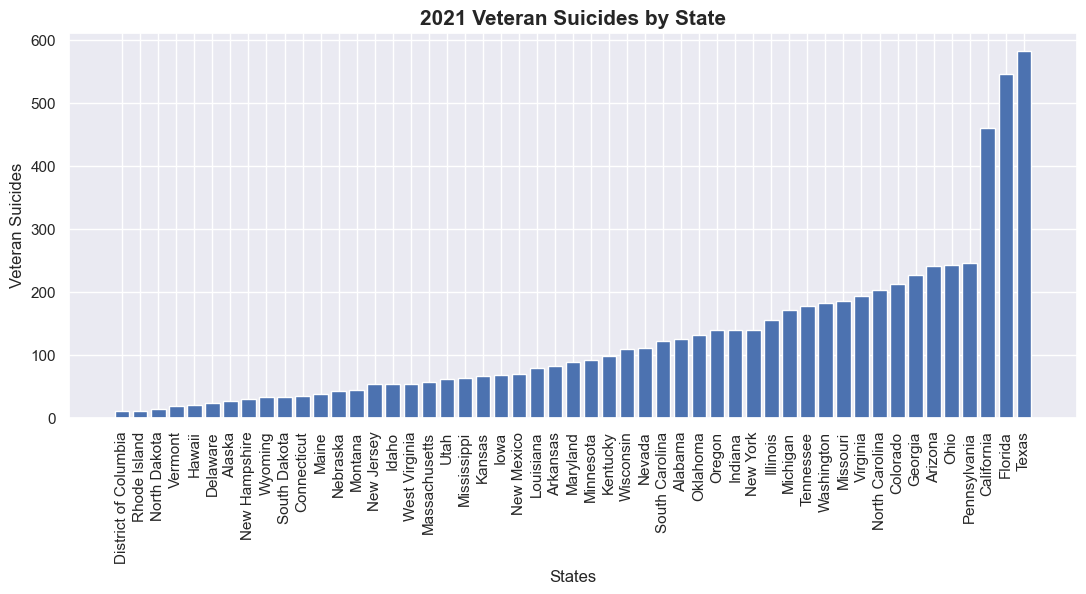

In [30]:
#Sort the dataframe df_state_total_2021 by the column 'Veteran Suicides' from lowest to highest

df_state_total_2021.sort_values(by='Veteran Suicides',inplace=True)

#Set the size of the figure

plt.rcParams['figure.figsize']=[13,5]

#Use tight_layout to ensure the labels are displayed correctly

plt.tight_layout()

#Create the layout

plt.xlabel('States')
plt.ylabel('Veteran Suicides')
plt.title('2021 Veteran Suicides by State',fontsize=15,fontweight='bold')

#Rotate the state names using xticks(rotation)

plt.xticks(rotation=90)

#plot the barplot

plt.bar(df_state_total_2021['State of Death'],df_state_total_2021['Veteran Suicides'])

Display a bar-chart of Veterance Suicides in 2021 of the 50 states and District of Columbia with the highest rates on the right and the lowest rates on the left side of the chart.

### Which region has the highest mean of veteran suicides?

In [31]:
#Create a dataframe that includes the region named df_region

df_region=df_state[['Geographic Region','Veteran Suicides']]

#print title in bold

print('\033[1m'+'Mean of Veteran Suicides by Region: '+'\033[0m')

#Create a dataframe with .groupby('Geographic Region') and calculate mean with .mean()

df_region_mean=df_region.groupby('Geographic Region').mean()

#Display Dataframe in descending order

print(df_region_mean.sort_values(['Veteran Suicides'],ascending=False))

Mean of Veteran Suicides by Region: 
                   Veteran Suicides
Geographic Region                  
All                     6374.619048
Southern                 155.176471
Western                  125.190476
Midwestern               113.690476
Northeastern              83.296296


Displaying a table of all years of veteran suicides shows that the geographic region with the highest mean was the Southern region.

In [32]:
#Create a dataframe df_region with the necessary columns

df_region=df_state[['Geographic Region','Veteran Suicides']]

'''Group table by region and use the describe() function to view statistical details eg, count, mean,
std,etc'''

df_region.groupby('Geographic Region').describe()

Veteran Suicides                                            \
                             count         mean         std     min      25%   
Geographic Region                                                              
All                           21.0  6374.619048  239.518575  6000.0  6142.00   
Midwestern                   252.0   113.690476   72.011505    10.0    53.75   
Northeastern                 189.0    83.296296   82.636715    10.0    29.00   
Southern                     357.0   155.176471  141.595621    10.0    77.00   
Western                      273.0   125.190476  133.551049    12.0    38.00   

                                           
                      50%     75%     max  
Geographic Region                          
All                6447.0  6545.0  6718.0  
Midwestern          105.0   170.0   295.0  
Northeastern         47.0    87.0   299.0  
Southern            113.0   182.0   600.0  
Western              71.0   162.0   621.0

The table shows basic statistical details for veteran suicides from 2001-2021.  From the table we can see the count of years and the number of states in each region, their mean, standard deviation, min, percentiles, and max.

<Axes: xlabel='Veteran Suicides', ylabel='Region'>

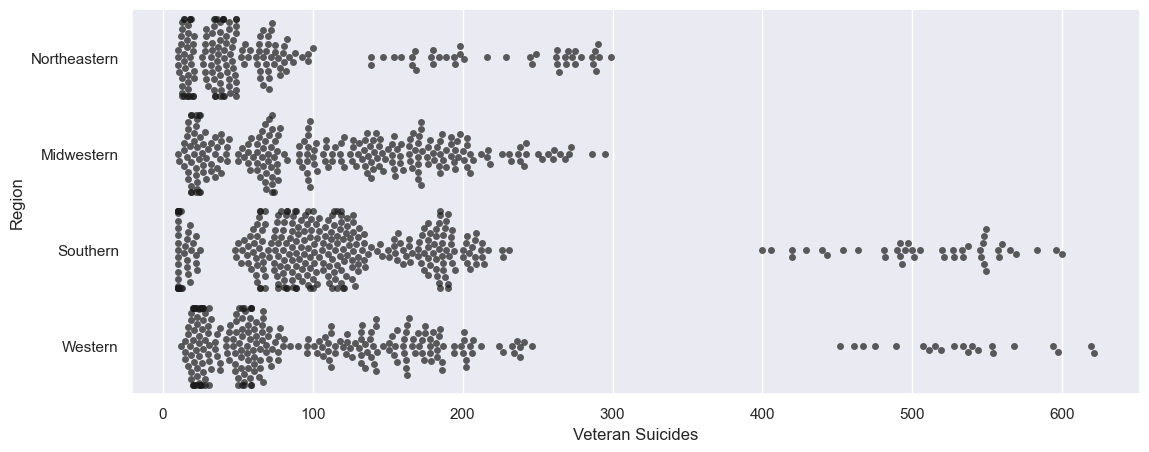

In [168]:
#Create a new column 'Region' to remove All from 'Geographic Region' and then dropna()

data=df_region.assign(Region=df_region['Geographic Region'].map({'Midwestern':'Midwestern','Northeastern':'Northeastern','Southern':'Southern','Western':'Western'})).dropna()

#Set the figure size

plt.figure(figsize=(13,5))

#Create a swarmplot with black points and slightly transparent

sns.swarmplot(x='Veteran Suicides',y='Region',data=data,color='k',alpha=0.7)

<Axes: title={'center': 'Veteran Suicides by Region'}, xlabel='Region', ylabel='Veteran Suicides'>

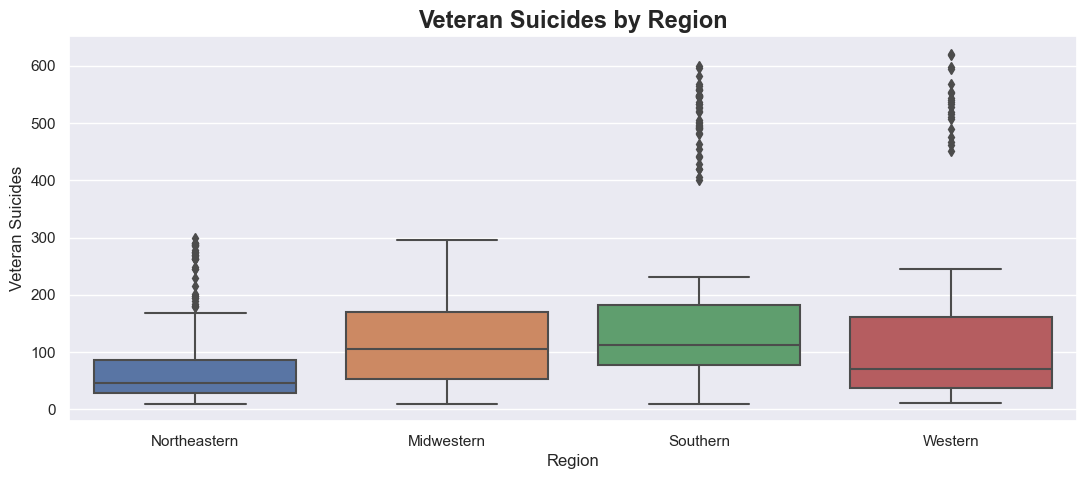

In [161]:
#Create a bolded title of the boxplot graph with matplotlib

plt.title('Veteran Suicides by Region',fontsize=17,fontweight='bold')

#Create a seaborn boxplot

sns.boxplot(x='Region',y='Veteran Suicides',data=data)

As we can see in the swarmplot and then reinforced by the boxplot both the Southern and Western have quite a few extreme
outliers that are raising their mean.  Also the Northeastern has quite a few outliers but they are still closer to the whisker so not as impactful to the overall numbers.  The Midwestern region appears to be the most normally distributed of the regions.

### Are veteran suicides increasing over the years?

In [35]:
#Create a Dataframe from df_sex with only necessary columns

df_state_col=df_state[['Year of Death','State of Death','Veteran Suicides']]

#Create a dataframe from df_sex_col with 'State of Death' == 'U.S. Total'

df_state_total=df_state_col.loc[(df_state['State of Death'] == 'U.S. Total')]

#Create a pivot_table of df_state_total to view all the years in a table format

df_state_total.pivot_table(index='State of Death',columns='Year of Death')

Veteran Suicides                                            \
Year of Death              2001  2002  2003  2004  2005  2006  2007  2008   
State of Death                                                              
U.S. Total                 6000  6142  6008  6004  6126  6035  6249  6567   

                            ...                                            \
Year of Death   2009  2010  ...  2012  2013  2014  2015  2016  2017  2018   
State of Death              ...                                             
U.S. Total      6519  6545  ...  6441  6501  6645  6616  6467  6686  6718   

                                  
Year of Death   2019  2020  2021  
State of Death                    
U.S. Total      6481  6278  6392  

[1 rows x 21 columns]

<Axes: xlabel='Year of Death'>

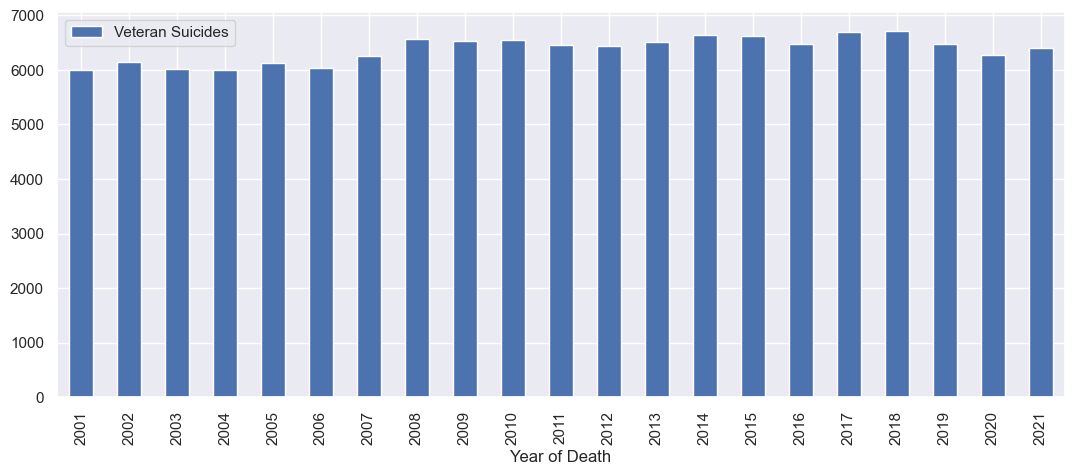

In [36]:
#Create a bar plot of the datafrade df_state_total

df_state_total.plot.bar(x='Year of Death')

In [37]:
'''This will display basic statistical details such as percentile, mean, and std, of the numeric values of the df_state
dataframe using the df.decribe function'''

df_state_total['Veteran Suicides'].describe()

count      21.000000
mean     6374.619048
std       239.518575
min      6000.000000
25%      6142.000000
50%      6447.000000
75%      6545.000000
max      6718.000000
Name: Veteran Suicides, dtype: float64

Reviewing the pivot table, bar chart, and describe all confirm that while the numbers do vary from year to year there is no evidence to show it is increasing at a high rate.  In the 21 years with a min of 6000, max of 6718, and mean of 6374.619048 there is evidence that indicate relatively steady numbers.  Also the low standard deviation (std) of 239.518575 also reinforces that.

### Are men or women more at risk for veteran suicide?

In [38]:
#Create a Dataframe from df_sex with only necessary columns

df_sex_col=df_sex[['Year of Death','Sex','Veteran Suicides']]

#Create a dataframe from df_sex_col with 'State of Death' == 'U.S. Total' & (df_sex['Sex'] != 'All'

df_sex_total=df_sex_col.loc[(df_sex['State of Death'] == 'U.S. Total') & (df_sex['Sex'] != 'All')]

#create a countplot with hue Sex
#sns.countplot(x='Year of Death',data=df_sex_total,hue='Sex')
df_sex_total.pivot_table(index='Sex',columns='Year of Death')

Veteran Suicides                                            \
Year of Death             2001  2002  2003  2004  2005  2006  2007  2008   
Sex                                                                        
Female                     154   134   151   167   189   173   186   208   
Male                      5846  6008  5857  5837  5937  5862  6063  6359   

                           ...                                            \
Year of Death  2009  2010  ...  2012  2013  2014  2015  2016  2017  2018   
Sex                        ...                                             
Female          226   232  ...   240   251   293   305   272   300   290   
Male           6293  6313  ...  6201  6250  6352  6311  6195  6386  6428   

                                 
Year of Death  2019  2020  2021  
Sex                              
Female          293   280   350  
Male           6188  5998  6042  

[2 rows x 21 columns]

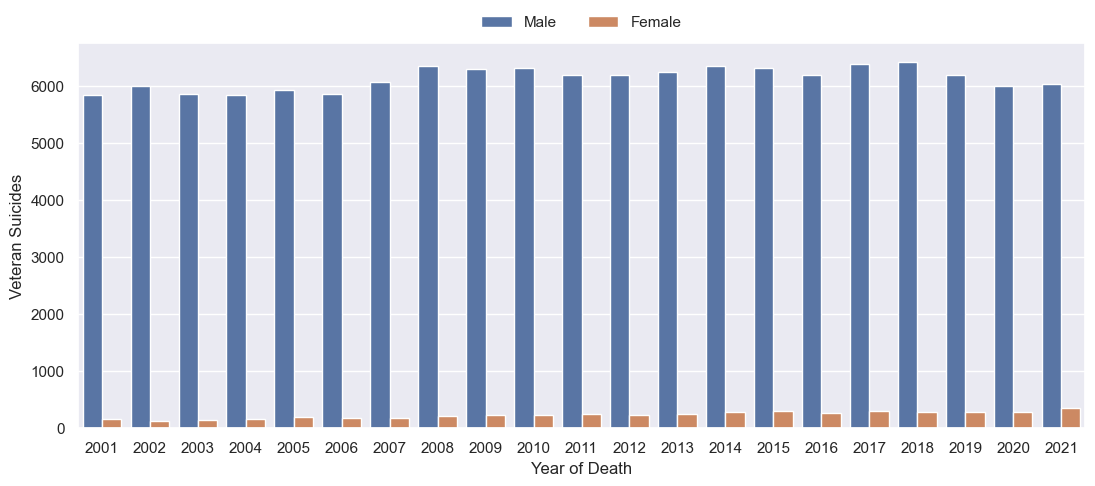

In [151]:
#Create a new column 'Gender' with sex of Female and Male to remove All from legend

data=df_sex_total.assign(Gender=df_sex_total['Sex'].map({'Female':'Female','Male':'Male'}))

#Create a Seaborn bar plot of df_sex_total using x='Year of Death',y='Veteran Suicides',hue='Sex'

ax=sns.barplot(data,x='Year of Death',y='Veteran Suicides',hue='Gender')

#Move the legend to ensure it is not on the bar plot

sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)


After reviewing the pivot table and the bar chart there is strong evidence to suggest statistically men are at a higher risk.  The only issue is the population does not provide total numbers of the men and women so this data is a bit inconclusive.

### Which age groups have the highest and lowest number of veteran suicides?

In [40]:
#Create a dataframe from df_age with only the necessaru columns 'Year','Geographic Region','State of Death','Age Group'

df_ages=df_age[['Year','Geographic Region','State of Death','Age Group']]

#Create a dataframe using .loc() with 'Geographic Region' == 'All') & 'Age Group' != 'All')

df_ages_total=df_age.loc[(df_age['Geographic Region'] == 'All') & (df_age['Age Group'] != 'All')]

#display the dataframe

df_ages_total

,Year,Geographic Region,State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate Per 100,000",General Population Suicides,"General Population Rate Per 100,000"
275,2001,All,U.S. Total,18-34,616,23.5,8293,12.3
276,2001,All,U.S. Total,35-54,2510,28.0,12577,14.9
277,2001,All,U.S. Total,55-74,1693,17.3,5749,13.2
278,2001,All,U.S. Total,75+,1178,26.4,2961,17.5
555,2002,All,U.S. Total,18-34,590,23.5,8346,12.3
...,...,...,...,...,...,...,...,...
5598,2020,All,U.S. Total,75+,1566,34.9,4421,20.2
5875,2021,All,U.S. Total,18-34,894,49.6,14230,18.8
5876,2021,All,U.S. Total,35-54,1704,35.5,15263,18.2
5877,2021,All,U.S. Total,55-74,2286,29.9,12411,16.2


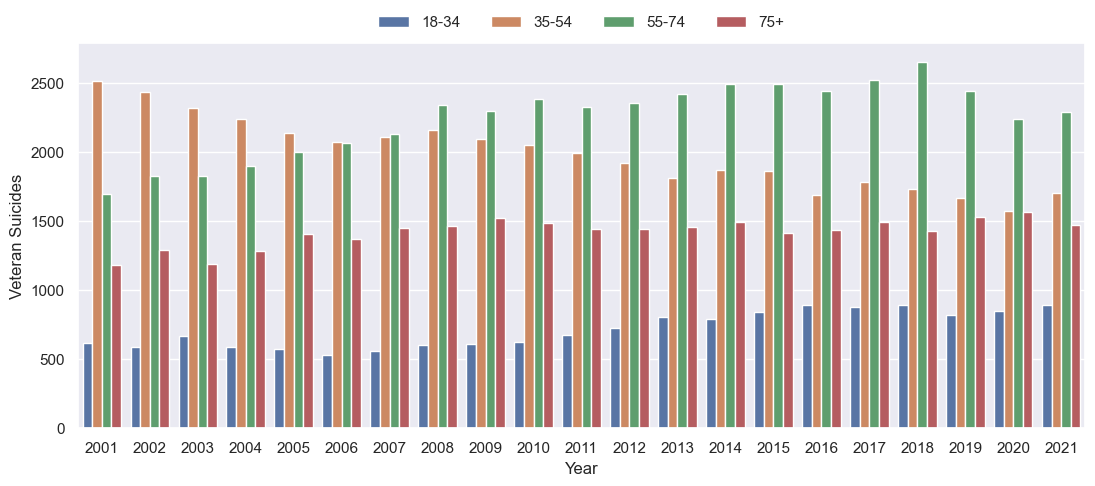

In [153]:
#Create a new column 'Age' to remove All from legend in dataframe df_ages_total

data=df_ages_total.assign(Age=df_ages_total['Age Group'].map({'18-34':'18-34','35-54':'35-54','55-74':'55-74','75+':'75+'}))

#Create a Seaborn bar plot of data using x='Year',y='Veteran Suicides',hue='Age'

ax=sns.barplot(data,x='Year',y='Veteran Suicides',hue='Age')

#Move the legend to ensure it is not on the bar plot

sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,)

Reviewing the bar chart it appears that from 2001-2005 the age group 35-54 had the highest number of veteran suicides followed by 55-74, 75+, and 18-34.  In 2006 35-54 and 55-74 were similar with 75+ and 18-34 unchanged in their order.  Starting in 2007 we see 55-74 with the highest number of veteran suicides with the remaining age groups still in their same order.

###  Are the age groups and their suicide rates consistent over the years?

In [42]:
#import scipy for statistics

from scipy import stats

#Create a dataframe for each 'Age Group'

df_18=df_age.loc[(df_age['Geographic Region'] == 'All') & (df_age['Age Group'] == '18-34')]
df_35=df_age.loc[(df_age['Geographic Region'] == 'All') & (df_age['Age Group'] == '35-54')]
df_55=df_age.loc[(df_age['Geographic Region'] == 'All') & (df_age['Age Group'] == '55-74')]
df_75=df_age.loc[(df_age['Geographic Region'] == 'All') & (df_age['Age Group'] == '75+')]

#Print each dataframe using the describe() function

print('18-34: ',stats.describe(df_18['Veteran Suicides']),'\n')
print('35-54: ',stats.describe(df_35['Veteran Suicides']),'\n')
print('55-74: ',stats.describe(df_55['Veteran Suicides']),'\n')
print('75+: ',stats.describe(df_75['Veteran Suicides']),'\n')

18-34:  DescribeResult(nobs=21, minmax=(531, 894), mean=714.8095238095239, variance=16605.261904761905, skewness=0.14360825029707977, kurtosis=-1.5961117871540393) 

35-54:  DescribeResult(nobs=21, minmax=(1575, 2510), mean=1986.3809523809523, variance=67388.84761904762, skewness=0.325687886391608, kurtosis=-0.7654332338743175) 

55-74:  DescribeResult(nobs=21, minmax=(1693, 2653), mean=2243.190476190476, variance=70556.7619047619, skewness=-0.6263396022502037, kurtosis=-0.6869527000457509) 

75+:  DescribeResult(nobs=21, minmax=(1178, 1566), mean=1419.047619047619, variance=10781.14761904762, skewness=-1.095186886739689, kurtosis=0.3888985873010835) 



As we can see there are 21 observations for each dataframe nobs (number of 'observations') for each dataframe which is the 21 years.  

With a variance of 10781.14761904762 the evidence indicates that the 75+ age group changes the least.  This is further backed up by the minmax of (1178,1566) and mean of 1419.047619047619.  We can also see that it is has a negative or left-skewed dsitribution as well.  Meaning it is has a long tail on its left side.  Also with a value of greater than -1 it indicates it is a highly skewed distribution.  Also the kurtosis of 0.3888985873010835 being close to 0 indicates they are normally distributed.

With a variance of 16605.261904761905 shows evidence that the 18-34 varies only slightly as well.  Again the minmax (531,894) and mean of 714.8095238095239 further reinforces this  Also with a skewness less than 0.5 this distribution is approximately symmetric.  The negative skewness of -1.095186886 also indicates that the distribution has lighter tails.

Though the 35-54 and 55-74 have higher variance, 67388.84761904762 and 70556.7619047619 respectively, we can tell from the minmax of (1575,2510) and (1693,2653 there is evidence that they do not vary greatly in the population.

### Veteran Suicide Rates per 100k of population for each state

In [43]:
#Create a dataframe to rename the columns 'Veteran Suicide Rate Per 100,000' & 'General Population Rate Per 100,000'

df_age_rename=df_age.rename(columns={'Veteran Suicide Rate Per 100,000':'Veteran Suicide Rate','General Population Rate Per 100,000':'General Population Suicide Rate'})

#Create a dataframe to select only the necessary columns'Year','State of Death','Age Group','Veteran Suicide Rate'

df_rate=df_age_rename[['Year','State of Death','Age Group','Veteran Suicide Rate']]

#Create a dataframe using .loc() ['Age Group'] == 'All' & ['State of Death'] != 'U.S. Total'

df_rate_state=df_rate.loc[(df_rate['Age Group'] == 'All') & (df_rate['State of Death'] != 'U.S. Total')]

#Display dataframe using head()

df_rate_state.head()

,Year,State of Death,Age Group,Veteran Suicide Rate
4,2001,All,All,17.3
9,2001,Connecticut,All,15.1
14,2001,Maine,All,25.0
19,2001,Massachusetts,All,15.6
24,2001,New Hampshire,All,19.9


In [44]:
#Create dataframe to use with cholorpleth

df_rate_state_2021=df_rate.loc[(df_rate['Year'] == 2021) & (df_rate['State of Death'] != 'All') & (df_rate['Age Group'] == 'All')]

#Call function to create 'State' column in dataframe df_state_total_2021 with state abbreviation

state_abbrev_mapping(df = df_rate_state_2021,
                     col= 'State of Death',
                     output_abbr = True,
                     add_new_col = True,
                     new_col = 'State',
                     case = 'upper')

#Display dataframe using head()

df_rate_state_2021.head()

,Year,State of Death,Age Group,Veteran Suicide Rate,State
5609,2021,Connecticut,All,20.6,CT
5614,2021,Maine,All,34.5,ME
5619,2021,Massachusetts,All,19.1,MA
5624,2021,New Hampshire,All,29.3,NH
5629,2021,New Jersey,All,16.3,NJ


In [45]:
fig = go.Figure(data=go.Choropleth(
    locations=df_rate_state_2021['State'],
    z = df_rate_state_2021['Veteran Suicide Rate'],
    locationmode = 'USA-states',
    colorscale = 'Oranges',
    colorbar_title = "2021 Veteran Suicide Rate",
    text = df_rate_state_2021['State of Death']
))

#layout for chloropleth

fig.update_layout(
    title_text = '2021 Veteran Suicide Rate by State',
    geo_scope='usa',
)

#shows the chloropleth

fig.show()

### What are the 5 highest states by Veteran Suicide Rates per 100k of population in 2021?

### Did the order of the highest and lowest states change based on the population?

In [46]:
#print 5 Highest States of Veteran Suicides in 2021 Using the ANSI Escape Sequence for Bold

print('\033[1m'+'5 Highest States of Veteran Suicides in 2021: '+'\033[0m')

#Print head of the df_state_total_2021 sorting from highest to lowest

print(df_state_total_2021[['Year of Death','State of Death','Veteran Suicides']].sort_values(['Veteran Suicides'],ascending=False).head())

#print 5 Highest States of Veteran Suicides in 2021 Using the ANSI Escape Sequence for Bold

print('\033[1m'+'5 Highest States of Veteran Suicide Rate in 2021: '+'\033[0m')

#Print head of the df_rate_state_2021 sorting from highest to lowest

print(df_rate_state_2021[['Year','State of Death','Veteran Suicide Rate']].sort_values(['Veteran Suicide Rate'],ascending=False).head())

5 Highest States of Veteran Suicides in 2021: 
      Year of Death State of Death  Veteran Suicides
1075           2021          Texas               583
1065           2021        Florida               546
1080           2021     California               461
1046           2021   Pennsylvania               246
1058           2021           Ohio               242
5 Highest States of Veteran Suicide Rate in 2021: 
      Year State of Death  Veteran Suicide Rate
5874  2021        Wyoming                  80.0
5829  2021       Colorado                  56.1
5844  2021        Montana                  51.2
5849  2021         Nevada                  50.7
5859  2021         Oregon                  49.6


In [47]:
#print 5 Lowest States of Veteran Suicides in 2021 Using the ANSI Escape Sequence for Bold

print('\033[1m'+'5 Lowest States of Veteran Suicides in 2021: '+'\033[0m')

#Print head of the df_state_total_2021 sorting from lowest to highest

print(df_state_total_2021[['Year of Death','State of Death','Veteran Suicides']].sort_values(['Veteran Suicides'],ascending=True).head())

#print 5 Highest States of Veteran Suicides in 2021 Using the ANSI Escape Sequence for Bold

print('\033[1m'+'5 Lowest States of Veteran Suicide Rate in 2021: '+'\033[0m')

#Print head of the df_rate_state_2021 sorting from lowest to highest

print(df_rate_state_2021[['Year','State of Death','Veteran Suicide Rate']].sort_values(['Veteran Suicide Rate'],ascending=True).head())

5 Lowest States of Veteran Suicides in 2021: 
      Year of Death        State of Death  Veteran Suicides
1064           2021  District of Columbia                10
1047           2021          Rhode Island                11
1057           2021          North Dakota                14
1048           2021               Vermont                18
1082           2021                Hawaii                20
5 Lowest States of Veteran Suicide Rate in 2021: 
      Year        State of Death  Veteran Suicide Rate
5739  2021  District of Columbia                   0.0
5629  2021            New Jersey                  16.3
5834  2021                Hawaii                  18.5
5644  2021          Rhode Island                  19.0
5619  2021         Massachusetts                  19.1


### What is the mean of Veteran Suicide Rates per 100k of population for each region?

In [48]:
#Create dataframe with only selected columns 'Year','Geographic Region','State of Death','Age Group','Veteran Suicide Rate'

df_rates=df_age_rename[['Year','Geographic Region','State of Death','Age Group','Veteran Suicide Rate']]

#Create dataframe with .loc ['Geographic Region'] != 'All' & ['Age Group'] == 'All' & ['State of Death'] == 'All'

df_rate_region=df_rates.loc[(df_rates['Geographic Region'] != 'All') & (df_rates['Age Group'] == 'All') & (df_rates['State of Death'] == 'All')]

#display dataframe

df_rate_region

,Year,Geographic Region,State of Death,Age Group,Veteran Suicide Rate
4,2001,Northeastern,All,All,17.3
54,2001,Midwestern,All,All,23.6
124,2001,Southern,All,All,24.1
214,2001,Western,All,All,26.1
284,2002,Northeastern,All,All,16.6
...,...,...,...,...,...
5534,2020,Western,All,All,36.2
5604,2021,Northeastern,All,All,24.4
5654,2021,Midwestern,All,All,33.5
5724,2021,Southern,All,All,34.4


In [49]:
#Create pivot_table (values='Veteran Suicide Rate',index='Geographic Region',columns='Year')

df_rate_region.pivot_table(values='Veteran Suicide Rate',index='Geographic Region',columns='Year')

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Geographic Region,,,,,,,,,,,,,,,,,,,,,
Midwestern,23.6,24.9,22.9,22.7,25.9,25.5,25.2,26.4,26.4,27.6,...,28.0,28.5,29.6,28.8,28.7,32.2,32.7,33.0,33.7,33.5
Northeastern,17.3,16.6,18.5,18.0,18.4,18.3,19.8,22.6,21.8,23.0,...,22.4,24.1,25.1,24.3,25.6,25.3,26.9,26.5,24.8,24.4
Southern,24.1,24.9,25.0,25.9,25.4,25.3,26.9,28.2,28.5,28.8,...,29.2,29.7,29.6,32.2,31.6,32.5,33.5,32.0,32.6,34.4
Western,26.1,28.0,27.6,27.4,27.7,28.8,31.6,33.8,34.6,33.8,...,34.2,34.0,37.4,35.9,35.5,37.9,37.5,37.6,36.2,39.2


### Did the order of the regions change based on the population?

In [50]:
#Reload dataframe with .groupby('Geographic Region') and calculate mean with .mean()

df_region_mean=df_region.groupby('Geographic Region').mean()

#Display Dataframe in descending order .groupby('Geographic Region') and calculate mean with .mean()

print(df_region_mean.sort_values(['Veteran Suicides'],ascending=False))

#Create a dataframe with selected columns

df_rate_region_col=df_rate_region[['Geographic Region','Veteran Suicide Rate']]

#Create dataframe with .groupby('Geographic Region') and calculate mean with .mean()

df_rate_region_mean=df_rate_region_col.groupby('Geographic Region').mean()

#Display Dataframe in descending order .groupby('Geographic Region') and calculate mean with .mean() for population

print(df_rate_region_mean.sort_values(['Veteran Suicide Rate'],ascending=False))

                   Veteran Suicides
Geographic Region                  
All                     6374.619048
Southern                 155.176471
Western                  125.190476
Midwestern               113.690476
Northeastern              83.296296
                   Veteran Suicide Rate
Geographic Region                      
Western                       33.238095
Southern                      29.019048
Midwestern                    27.919048
Northeastern                  22.285714
All                                 NaN


Reviewing the tables above we see that though the Southern region has the highest number of veteran suicides by population it is replaced as the leader by the Western region.  The Midwestern and Northeastern regions did not change in rank.

### Are the Veteran Suicide Rates per 100k of population for the Regions changing?

<Axes: xlabel='Geographic Region', ylabel='Year'>

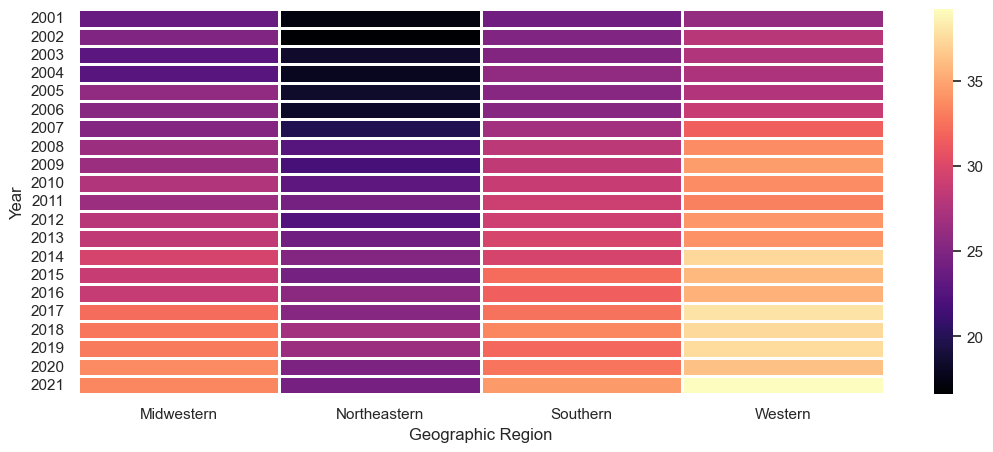

In [51]:
#Create pivot_table (values='Veteran Suicide Rate',index='Year',columns='Geographic Region') and assign to vetrate

vetrate=df_rate_region.pivot_table(values='Veteran Suicide Rate',index='Year',columns='Geographic Region')

#Create sns heatmap with variable vetrate

sns.heatmap(vetrate,cmap='magma',linecolor='white',linewidths=1)

As we can see here though the rates might vary overall there is evidence that indicates an overalll trend of increasing in each of the regions.

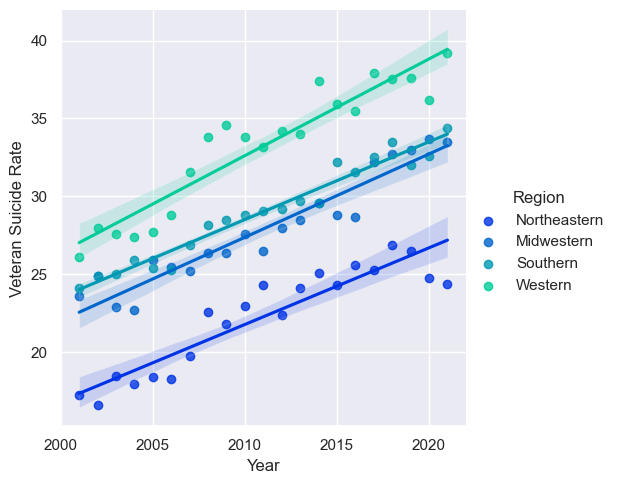

In [163]:
#Create a new column 'Region' to remove All from 'Geographic Region' and then dropna()

data=df_rate_region.assign(Region=df_rate_region['Geographic Region'].map({'Midwestern':'Midwestern','Northeastern':'Northeastern','Southern':'Southern','Western':'Western'})).dropna()

#Create lmplot (x='Year',y='Veteran Suicide Rate',hue='Geographic Region',data=df_rate_region,palette='winter')

sns.lmplot(x='Year',y='Veteran Suicide Rate',hue='Region',data=data,palette='winter')

###  Are veterans more vulnerable to suicide than the general population?

In [53]:
#Load dataframe df_age_rename which was the df_age with renamed columns
df_age_rename

#Create dataframe with .loc() ['State of Death'] == 'U.S. Total' & ['Age Group'] == 'All')

df_rate2=df_age_rename.loc[(df_age['State of Death'] == 'U.S. Total') & (df_age['Age Group'] == 'All')]

#Create dataframe with only selected columns to use for iplot

df_rate_only=df_rate2[['Veteran Suicide Rate', 'General Population Suicide Rate']]

#Create plotly interactive image kind='box'

df_rate_only.iplot(kind='box')

In [54]:
#Print each dataframe using the describe() function

print('Veteran Suicide Rate: ',stats.describe(df_rate_only['Veteran Suicide Rate']),'\n')
print('General Population Suicide Rate: ',stats.describe(df_rate_only['General Population Suicide Rate']),'\n')

Veteran Suicide Rate:  DescribeResult(nobs=21, minmax=(23.3, 33.9), mean=28.685714285714283, variance=11.837285714285715, skewness=-0.11854631683051597, kurtosis=-1.2921928660521012) 

General Population Suicide Rate:  DescribeResult(nobs=21, minmax=(13.9, 18.4), mean=16.038095238095234, variance=2.2934761904761896, skewness=0.032962837754799815, kurtosis=-1.4210950133065836) 



The mean of each of the populations as well as the variance and skewness have strong evidence that each population has a normal distrubtion.  Also, the interactive boxplot shows that all measures, including mean, min, max, etc has strong evidence that veterans are a much higher risk for suicide than the general population.

# ECDF

In [55]:
# Create ECDF function
def ecdf(data):
    
    #Number of data points: n
    n=len(data)
    
    #x-data for the ECDF: x
    x=np.sort(data)
    
    #y-data for the ECDF: y
    y=np.arange(1,n+1)/n
    
    return x,y

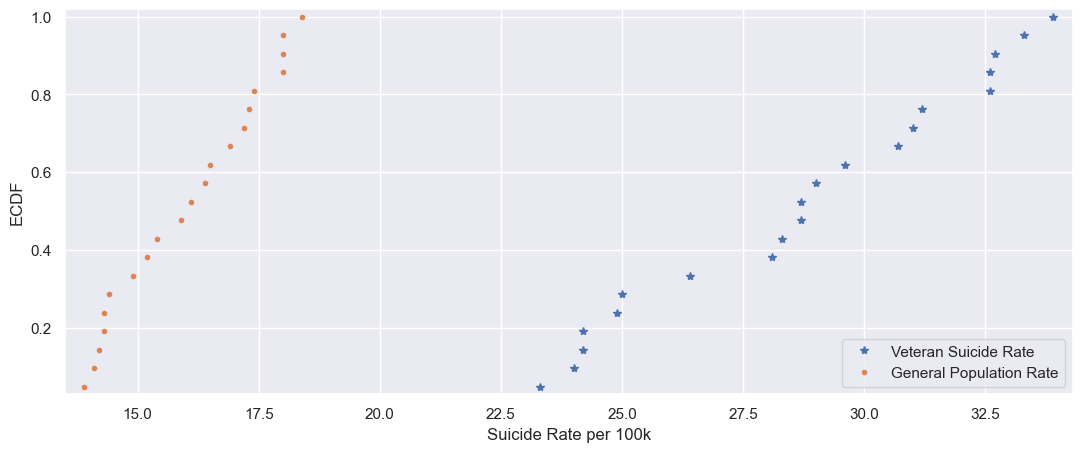

In [56]:
#compute ECDFS passing the data for both veteran suicide rate and general population suicide rate

#compute x,y for veteran and general population by calling the dataframes

x_vet,y_vet=ecdf(df_rate_only['Veteran Suicide Rate'])
x_genpop,y_genpop=ecdf(df_rate_only['General Population Suicide Rate'])

#Plot both ECDFs on the same plot using variable underscore

_=plt.plot(x_vet,y_vet,marker='*',linestyle='none')
_=plt.plot(x_genpop,y_genpop,marker='.',linestyle='none')

#Make margins

plt.margins(0.02)

#Annotate the plot

plt.legend(('Veteran Suicide Rate','General Population Rate'),loc='lower right')
_=plt.xlabel('Suicide Rate per 100k')
_=plt.ylabel('ECDF')
             
#Display the plot

plt.show()

# Correlation

We will see the outpot of the correlation values of the numerical columns.  We will also include the pvlaues to see the
significance of the correlation:

-The p-value is < 0.001: we say there is strong evidence that the correlation is significant.

-The p-value is < 0.05: there is moderate evidence that the correlation is significant.

-The p-value is < 0.1:there is weak evidence that the correlation is significant.

-The p-value is > 0.1: there is no evidence that the correlation is significant.

In [57]:
#Correlation of all numerical columns in df_state

sns.set()
corr_state=df_state.corr(numeric_only=True)
corr_state

,Year of Death,Veteran Suicides
Year of Death,1.000000,0.007332
Veteran Suicides,0.007332,1.000000


In [58]:
#Correlation of all numerical columns in df_sex

sns.set()
corr_sex=df_sex.corr(numeric_only=True)
corr_sex

,Year of Death,Veteran Suicides
Year of Death,1.000000,-0.054927
Veteran Suicides,-0.054927,1.000000


In [59]:
#Correlation of all numerical columns in df_age

sns.set()
corr_age=df_age.corr(numeric_only=True)
corr_age

,Year,Veteran Suicides,"Veteran Suicide Rate Per 100,000",General Population Suicides,"General Population Rate Per 100,000"
Year,1.000000,0.004661,0.196472,0.041934,0.260249
Veteran Suicides,0.004661,1.000000,0.061282,0.964534,-0.017305
"Veteran Suicide Rate Per 100,000",0.196472,0.061282,1.000000,0.084813,0.413232
General Population Suicides,0.041934,0.964534,0.084813,1.000000,-0.026004
"General Population Rate Per 100,000",0.260249,-0.017305,0.413232,-0.026004,1.000000


Text(0.5, 1.0, 'df.corr()')

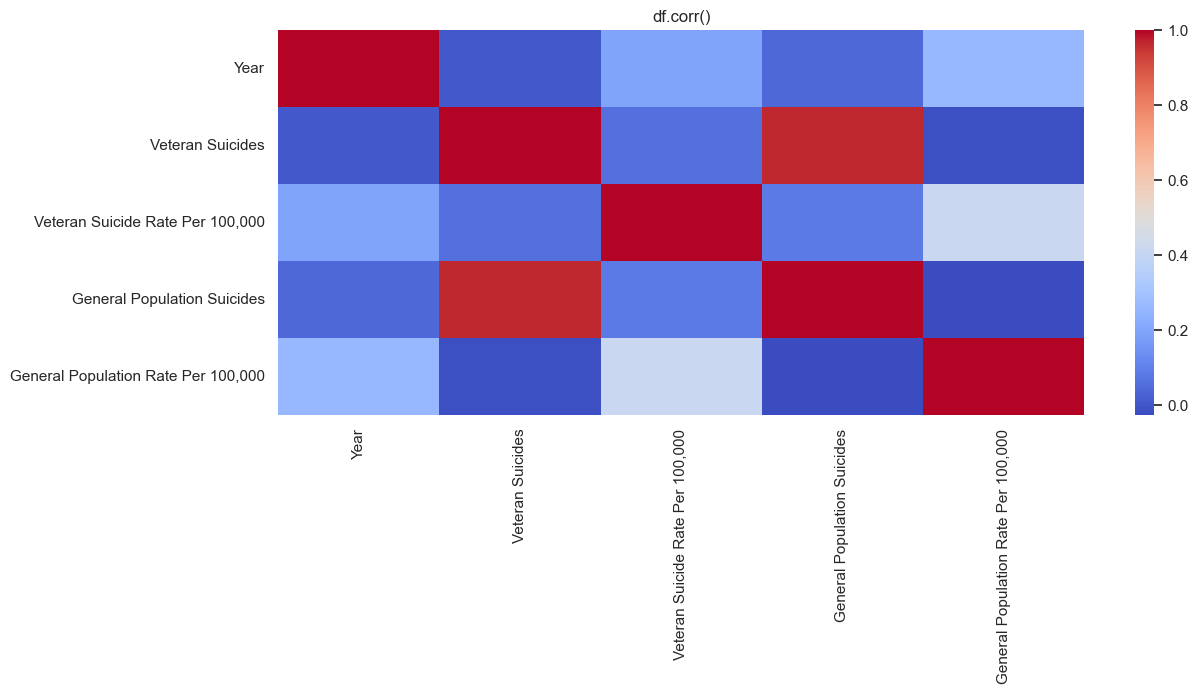

In [64]:
#Print a heatmap using the correlation function for df_age

sns.heatmap(df_age.corr(numeric_only=True),cmap='coolwarm')
plt.title('df.corr()')

# Pearson's Correlation Test

In [62]:
#Using Pearson's Correlation Test

#Importing scientific library to perform statistical calculations

from scipy.stats import pearsonr

#Define data1 with 'Veteran Suicides'

data1=df_age['Veteran Suicides']

#Define data2 with 'Veteran Suicides'

data2=df_age['General Population Suicides']

#Declare variable stat and perform pearsonr function

stat,p=pearsonr(data1,data2)

#Print result with 3 decimals

print('stat=%.3f,p=%.3f' % (stat,p))

#Adding a conditional selection

if p > 0.05:
    print('Probably Independent')
else:
    print('Probably Dependent')

stat=0.965,p=0.000
Probably Dependent


According to the Pearson's Correlation test with a p-value of 0.000 there it is likely there is strong evidence that the correlation is significant between the veteran and general population suicides.

# Correlation Matrix

In [61]:
#define a function name it pearson_r that will take two arguments x and y
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat

    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient of 'Year' and 'Veteran Suicides' from df_age

vet_suicide=df_age['Veteran Suicides']
genpop_suicide=df_age['General Population Suicides']

r=pearson_r(vet_suicide,genpop_suicide)


# Print the result

print(r)

0.9645344444756127


With a value of 0.9645344444756127 this shows strong and positive correlation meaning when one variable increases, the other tends to as well for the Veteran and General Population Suicides.

# Normal Distribution test

* The normality tests all report a P value.

* To understand any P value, you need to know the null hypothesis.
    * the null hypothesis is that all the values were sampled from a population that follows a Gaussian distribution. ...If the P value is less than or equal to 0.05 (the significance level), the answer is No.

* P-value ≤ α: The data do not follow a normal distribution (Reject H0).

* If the p-value is less than or equal to the significance level, the decision is to reject the null hypothesis and conclude that your data does not follow a normal distribution.

* P-value > α: Cannot conclude the data do not follow a normal distribution (Fail to reject H0).

* If the p-value is larger than the significance level, the decision is to fail to reject the null hypothesis because you do not have enough evidence to conclude that your data do not follow a normal distribution.

In [170]:
#Import normaltest from scipy

from scipy.stats import normaltest

In [177]:
#Assign the General Population Suicide Rate to a variable named data

data=df_age['Veteran Suicides']

#Create two variables stat and p then apply the normaltest function

stat,p=normaltest(data)

#Print results with only 3 decimals

print('stat=%.3f,p=%.3f'%(stat,p))

#Add a conditional print

if p <= 0.05:
    print('Data does not follow a normal distribution: Reject H0')
else:
    print('Cannot conclude the data does not follow a normal distribution: Fail to reject H0')

stat=8718.814,p=0.000
Data does not follow a normal distribution: Reject H0


We will also use a Seaborn distplot to visually convey if the data is normally distributed

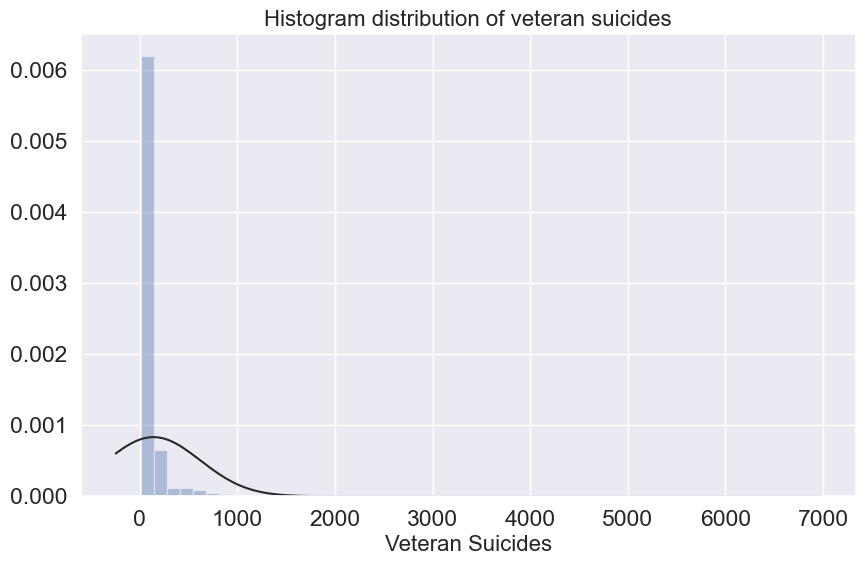

In [180]:
#plt.rcParams to set the figure width width of 10 and height of 6
#sns.set_style('darkgrid')

plt.rcParams['figure.figsize']=[10,6]
sns.set_style('darkgrid')

#set context,font scale, and font size

sns.set_context('notebook',font_scale=1.5,rc={'font.size':16,'axes.titlesize':16,'axes.labelsize':16}) 

#the fit will going to super impose a normal curve to the histogram
# or to the distribution
# we set kde to false because by default it uses the kde

sns.distplot(df_age['Veteran Suicides'],fit=stats.norm,kde=False)

# add title and xlabel to the plot

plt.title('Histogram distribution of eteran suicides')
plt.xlabel('Veteran Suicides')

#Display plot

plt.show()

Both the normaltest and the distplot confirm that the data is not normally dsitributed

In [176]:
#Assign the Veteran Suicide Rate to a variable named data

data=df_age['General Population Suicides']

#Create two variables stat and p then apply the normaltest function

stat,p=normaltest(data)

#Print results with only 3 decimals

print('stat=%.3f,p=%.3f'%(stat,p))

#Add a conditional print

if p <= 0.05:
    print('Data does not follow a normal distribution: Reject H0')
else:
    print('Cannot conclude the data does not follow a normal distribution: Fail to reject H0')

stat=8872.723,p=0.000
Data does not follow a normal distribution: Reject H0


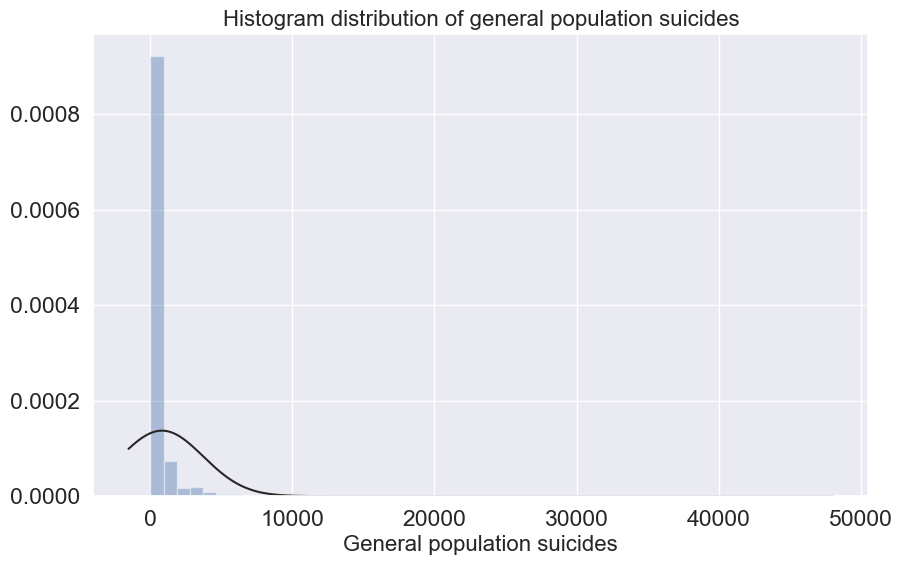

In [181]:
#plt.rcParams to set the figure width width of 10 and height of 6
#sns.set_style('darkgrid')

plt.rcParams['figure.figsize']=[10,6]
sns.set_style('darkgrid')

#set context,font scale, and font size

sns.set_context('notebook',font_scale=1.5,rc={'font.size':16,'axes.titlesize':16,'axes.labelsize':16}) 

#the fit will going to super impose a normal curve to the histogram
# or to the distribution
# we set kde to false because by default it uses the kde

sns.distplot(df_age['General Population Suicides'],fit=stats.norm,kde=False)

# add title and xlabel to the plot

plt.title('Histogram distribution of general population suicides')
plt.xlabel('General population suicides')

#Display plot

plt.show()

Again both the normaltest and the distplot confirm that the data is not normally distributed

# Chi-Squared Test

* Tests whether two categorical variables are related or independent.
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [184]:
#Import Chi-squared test from scipy

from scipy.stats import chi2_contingency

In [186]:
#Assign Veteran Suicides and General Population Suicides to a variable named data

data=df_age[['Veteran Suicides','General Population Suicides']]

#Create variables stat,p,dof (degrees of freedom),expected (expectedvalues) and apply the Chi-Squared function

stat,p,dof,expected=chi2_contingency(data)

#Print stat and p with only 3 decimals

print('stat=%.3f,p=%.3f'%(stat,p))

#Add a conditional print

if p > 0.05:
    print('H0: Probably independent')
else:
    print('H1: Probably dependent')

stat=246462.750,p=0.000
H1: Probably dependent


# One sample z test

In [188]:
#Import ztest from statsmodels.stats.weightstats

from statsmodels.stats.weightstats import ztest

#import scipy.stats

import scipy.stats as stats

In [196]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Year                                 5880 non-null   int64   
 1   Geographic Region                    5880 non-null   category
 2   State of Death                       5880 non-null   object  
 3   Age Group                            5880 non-null   category
 4   Veteran Suicides                     5880 non-null   int64   
 5   Veteran Suicide Rate Per 100,000     5880 non-null   float64 
 6   General Population Suicides          5880 non-null   int64   
 7   General Population Rate Per 100,000  5880 non-null   float64 
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 287.7+ KB


In [200]:
#Create dataframe df_age_rename with renamed columns to Veteran Suicides and General Population Suicides

df_age_rename=df_age.rename(columns={'Veteran Suicide Rate Per 100,000':'Veteran Suicide Rate','General Population Rate Per 100,000':'General Population Rate'})

#Assign Veteran Suicides and General Population Suicides to a variable named data

data=df_age_rename[['Veteran Suicide Rate','General Population Rate']]

#Display data with .head() function

data.head()

,Veteran Suicide Rate,General Population Rate
0,27.9,9.7
1,21.8,11.0
2,12.0,9.2
3,17.2,10.6
4,17.3,10.2


Before completing the one z test we need to calculate some descriptive summaries of the data.

* We are going to create a data frame one column is the suicide rate type and other one is the suicide rate.
* The suicide type will be Veteran Suicide Type and General Population Rate and then the suicide rate.
* This will allow to do a groupby.
* I will then call the melt function of pandas
* I will then create a new dataframe melted_df that will contain the two new columns.
* The new variable name will be Suicide_Type. So Suicide_Type will be Veteran Suicides Rate or General Population Rate. The values will be the suicides rate so the argument value_name will have the value "Suicide_Rate"

In [202]:
#Created melted_df with Pandas melt with var_name='Suicide_type' and value_name='Suicide_rate'

melted_df=pd.melt(data,var_name='Suicide_type',value_name='Suicide_rate')

#Display melted_df using print with .head()  and .tail()function

print(melted_df.head())

print(melted_df.tail())

           Suicide_type  Suicide_rate
0  Veteran Suicide Rate          27.9
1  Veteran Suicide Rate          21.8
2  Veteran Suicide Rate          12.0
3  Veteran Suicide Rate          17.2
4  Veteran Suicide Rate          17.3
                  Suicide_type  Suicide_rate
11755  General Population Rate          18.8
11756  General Population Rate          18.2
11757  General Population Rate          16.2
11758  General Population Rate          20.3
11759  General Population Rate          18.0


In [203]:
#Create new dataframe bygroup with groupy of the melted_df by Suicide_Type and numeric value will be the Suicides

bygroup=melted_df.groupby(['Suicide_type'])['Suicide_rate']

#Aggregate the dataframe bygroup

bygroup.aggregate(['count',np.mean,np.std]).round(2)

,count,mean,std
Suicide_type,,,
General Population Rate,5880,17.39,7.17
Veteran Suicide Rate,5880,24.59,17.84


### Testing the hypothesis that the mean is 16 against the alternative it is GREATER

𝐻0:𝜇<=𝜇0
𝐻1:𝜇>𝜇0

* Call ztest that takes the following arguments:
    * General Population Rate of data
    * value=16
    * alternative='larger'
    * ddof=1.0 (Degrees of freedom use in the calculation of the variance of the mean estimate. In the case of comparing means this is one.)
* Returns stat,p

In [221]:
#Create variables stat and p and apply the ztest larger test

(stat,p)=ztest(data['General Population Rate'],value=16,alternative='larger',ddof=1.0)

#Print ztest results round to 5 decimal places

print('The test statistic is: ',round(stat,5))
print('The p-value is: ',round(p,7))

#Add a conditional print

if p < 0.05:
    print('The result is not significant')
else:
    print('The result is significant')

The test statistic is:  14.89528
The p-value is:  0.0
The result is not significant


Based on the p-value we say it is unlikely there is enough evidence to reject the null hypothesis in favor of the the alternative hypothesis.

# Conclusion

After cleaning, organizing, plotting, and using data visualization we were able to answer the following questions:

    1. Which years have the highest and lowest number of veteran suicides?
       
       2018 has the highest number of veteran suicides with 6718. Followed by 2017, 2014, 2015, and 2008.
       2001 has the lowest number of veteran suicides with 6000.  Followed by 2004, 2003, 2006, and 2005.
       
    2. Which states have the highest and lowest number of veteran suicides in 2021?
       
       The state with the highest number of veteran suicides in 2021 is Texas with 583.
       Followed by Florida, California, Pennsylvania, and Ohio.
       The state with the lowest number of veteran suicides in 2021 is District of Columbia with 10.
       Followed by Rhode Island, North Dakota, Vermont, and Hawaii.       
       We will determine later if population factors into this.
       
    3. Which region has the highest mean of veteran suicides?
       
       The region with the highest mean of veteran suicides is the Southern region with a mean of 155.176471.
       We will determine later if population factors into this.
    
    4. Are veteran suicides increasing over the years?
    
       Though the numbers do vary, including a general increase, there is no evidence that there is a dramatic 
       change in the suicide rate.

    5. Are men or women more at risk for veteran suicide?
    
       There appears to be evidence that men are at a higher risk than women but without the population providing
       numbers of each gender the findings are a bit incomplete.

    6. Which age groups have the highest and lowest number of veteran suicides?
    
       From 2001-2005 the age group 35-54 had the highest number of veteran suicides followed by 55-74, 75+,
       and 18-34.  In 2006 35-54 and 55-74 were similar with 75+ and 18-34 unchanged in their order.  Starting 
       in 2007 we see 55-74 with the highest number of veteran suicides with the remaining age groups still in 
       their same order.

    7. Are the age groups and their suicide rates consistent over the years?
    
       Though there is slight variance in each of the 4 age groups there is strong (18-34,75+) to moderate
       (35-54,55-74) evidence that suicides are fairly consistent and normally distributed.

    8. What are the highest Veteran Suicide Rates per 100k of population for the states in 2021?
    
       The 5 highest states by suicide rate are Wyoming(80.0), Colorado(56.1),Montana(51.2), Nevada (50.7),
       and Oregon(49.6).
       
    9. Did the order of the highest and lowest states change based on the population?
    
       The highest ranked states changed drastically.  By number they were Texas, Florida, California,
       Pennsylvania, and Ohio.  By rate they were Wyoming, Colorado, Montana, Nevada, and Oregon.  The
       lowest ranked states also had minor changes but had some consistency as well.  By just numbers they
       were District of Columbia, Rhode Island, North Dakota, Vermont, and Hawaii.  By rate they were
       District of Columbia (based on the 0 this data was a bit inconclusive), New Jersey, Hawaii, Rhode
       Island, and Massachusetts​.

    10. What is the mean of Veteran Suicide Rates per 100k of population for each region?
    
        The mean of the regions are as follows:
        Western       33.238095
        Southern      29.019048
        Midwestern    27.919048
        Northeastern  22.285714

    11. Did the order of the regions change based on the population?
    
        Southern was the highest by number and Western by rate but each was no lower than second.  Midwestern
        and Northeastern were unchanged.

    12. Are the Veteran Suicide Rates per 100k of population for the Regions changing?
    
        There is moderate evidence it is generally increasing over the years but not at a static rate and can vary.

    13. Are veterans more vulnerable to suicide than the general population?
    
        There is strong evidence that it is likely veterans are at a much higher risk than the general population.
     

# Hypothesis Testing Conclusion

We completed the following hypothesis testing along with their conclusions:

* Pearson's Correlation Test
    * According to the Pearson's Correlation test with a p-value of 0.000 it is likely there is strong evidence that the correlation is significant between the veteran and general population suicides.
    
* Correlation Matrix
    * With a value of 0.9645344444756127 this shows strong and positive correlation meaning when one variable increases, the other tends to as well for the Veteran and General Population Suicides.
    
* Normal distribution Test
    * Based on the p-value of 0.00 for both the Veteran and General Population Suicides we say data does not follow a normal distribution: Reject H0.  We also visually confirmed this with a Seaborn histogram.
    
* Chi-Squared Test
    * Based on the p-value of 0.000 for the Veteran and General Population Suicides we say they are probably dependent.  Meaning when one variable increases, the other tends to as well.
    
* One sample z test
    * Based on the p-value of 0.0 we say the result is not significant or it is unlikely there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.